# Chopping and nodding in Scopesim

This notebook demonstrates how to use the `ChopNod` effect in Scopesim. Both chopping and nodding are currently defined as two-point patterns, where the throw direction is given as a 2D vector (dx, dy) in `metis['chop_nod'].meta['chop_offsets']` and `metis['chop_nod'].meta['nod_offsets']`. For parallel nodding, the two vectors are parallel (typically nod_offset = - chop_offset, giving a three-point pattern), for perpendicular nodding, the vectors are orthogonal.  

In [1]:
import scopesim as sim
sim.bug_report()

# Edit this path if you have a custom install directory, otherwise comment it out.
sim.rc.__config__["!SIM.file.local_packages_path"] = "../../../../" 

Python:
 3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)]

scopesim :  0.4.0
numpy :  1.19.5
scipy :  1.5.4
astropy :  4.1
matplotlib :  3.3.4
synphot :  1.0.1
skycalc_ipy : version number not available
requests :  2.25.1
bs4 :  4.9.3
yaml :  5.4.1

Operating system:  Windows
         Release:  10
         Version:  10.0.19041
         Machine:  AMD64


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

If you haven't got the instrument packages yet, uncomment the following cell.

In [3]:
# sim.download_package(["instruments/METIS", "telescopes/ELT", "locations/Armazones"])

In [4]:
cmd = sim.UserCommands(use_instrument="METIS", set_modes=['img_n'])

In [5]:
metis = sim.OpticalTrain(cmd)
metis['chop_nod'].include = True

The default is perpendicular nodding, with the chop throw in the x-direction and the nod throw in the y direction.

In [6]:
print("Chop offsets:", sim.utils.from_currsys(metis['chop_nod'].meta['chop_offsets']))
print("Nod offsets: ", sim.utils.from_currsys(metis['chop_nod'].meta['nod_offsets']))

Chop offsets: [3, 0]
Nod offsets:  [0, 3]


In [7]:
src = sim.source.source_templates.star()

In [8]:
metis.observe(src, update=True)
imghdu = metis.readout()[0][1]

Requested exposure time: 1.000 s
Exposure parameters:
                DIT: 0.011 s  NDIT: 90
Total exposure time: 0.990 s


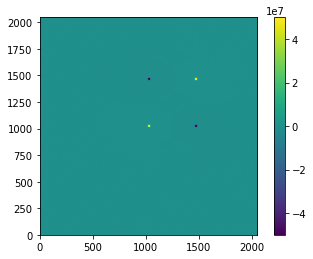

In [9]:
plt.imshow(imghdu.data, origin='lower', vmin=-5e7, vmax=5e7)
plt.colorbar()

For parallel nodding, turn the nod throw into the x-direction as well.

In [10]:
metis['chop_nod'].meta['nod_offsets'] = [-3, 0]

In [11]:
imghdu_par = metis.readout()[0][1]

Requested exposure time: 1.000 s
Exposure parameters:
                DIT: 0.011 s  NDIT: 90
Total exposure time: 0.990 s


In [ ]:
plt.imshow(imghdu_par.data, origin='lower', vmin=-5e7, vmax=5e7)

Other four-point patterns are possible:

In [ ]:
metis['chop_nod'].meta['nod_offsets'] = [-3, 3]
imghdu_3 = metis.readout()[0][1]
plt.imshow(imghdu_3.data, origin='lower', vmin=-5e7, vmax=5e7)

In [ ]:
metis['chop_nod'].meta['chop_offsets'] = [-3, 2]
metis['chop_nod'].meta['nod_offsets'] = [2, 3]
imghdu_4 = metis.readout()[0][1]
plt.imshow(imghdu_4.data, origin='lower', vmin=-5e7, vmax=5e7)